# Exploramiento de base de datos del Titanic

In [2]:
#Importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [7]:
# Primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='str')

In [8]:
#exploración básica
print(df.shape)
print(df.dtypes)


(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name               str
Sex                str
Age            float64
SibSp            int64
Parch            int64
Ticket             str
Fare           float64
Cabin              str
Embarked           str
dtype: object


In [9]:
#esradisticas basicas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
#determinemos los grupos o secciones que hay entre las variables
print(df['Embarked'].value_counts())
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())
print(df['Age'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Age
24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64


In [19]:
#chequemos la moda de las edades ya que hay de todo al parecer
print(df['Age'].mode())

0    24.0
Name: Age, dtype: float64


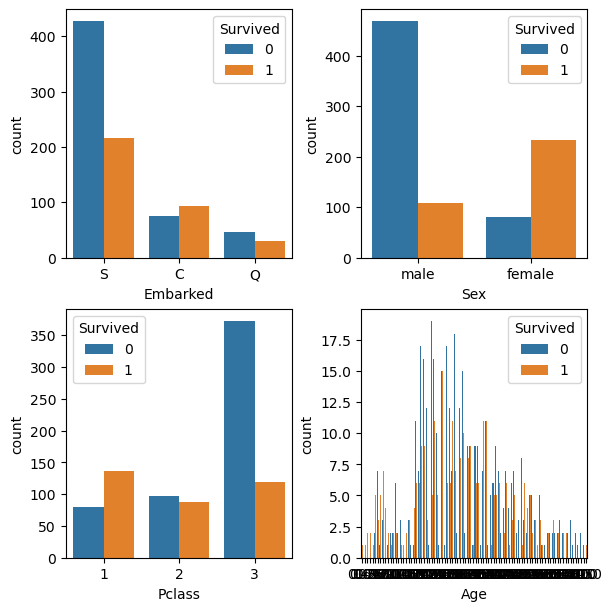

In [ ]:
#hagamos lo anterior de manera grafica, incluso poniendo una clasificacion extra para ver quien sobrevivio
fig, axes = plt.subplots(2,2, figsize=(6, 6),layout="constrained")
sns.countplot(df, x="Embarked",hue='Survived',ax=axes[0,0])
sns.countplot(df, x="Sex",hue='Survived',ax=axes[0,1])
sns.countplot(df, x="Pclass",hue='Survived',ax=axes[1,0])
sns.countplot(df, x="Age",hue='Survived',ax=axes[1,1])
plt.show()

Como podemos ver, la grafica de la edad es enorme por la variación inmensa que hay pero podemos notar a simple vista que en las edades tempranas hay muchas lineas naranjas lo que suguiere que los niños eran prioridad para que sobrevivieran la catastrofe. Aun asi eliminemosla ya que esta fea.

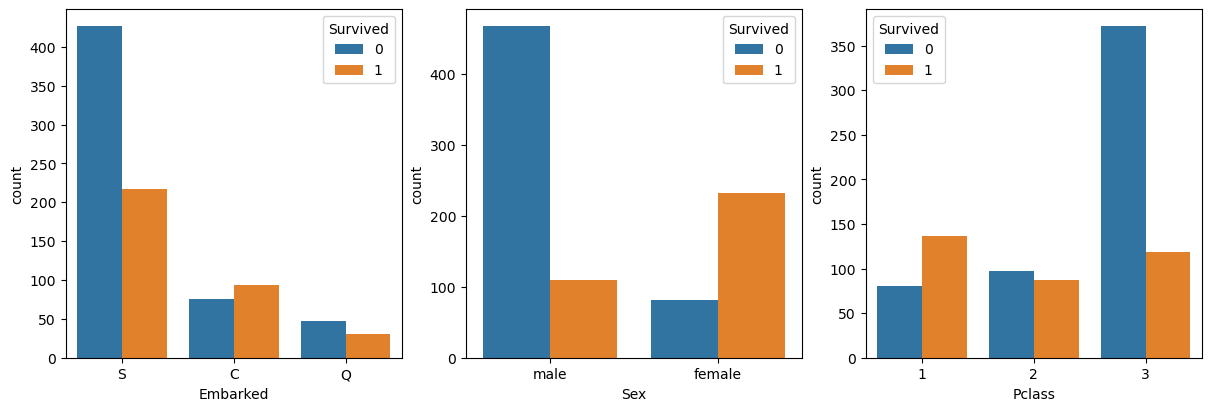

In [42]:
fig, axes = plt.subplots(1,3, figsize=(12, 4),layout="constrained")
sns.countplot(df, x="Embarked",hue='Survived',ax=axes[0])
sns.countplot(df, x="Sex",hue='Survived',ax=axes[1])
sns.countplot(df, x="Pclass",hue='Survived',ax=axes[2])
plt.show()

Aqui podemos ver sencillamente que la mayor cantidad de personas que sobrevivio fue porque embarcaron en el puerto C en cuanto a proporcion. Es decir, si es obvio que sobrevivieron mas personas del puerto S pero por que en total embarcaron mas. Mientras tanto, los pasajeros sobrevivientes del puerto C fueron los unicos que superaron a los no sobrevivientes en su mismo puerto. Ademas podemos ver que muchas mujeres sobrevivieron y bastantes murieron. Quizas los hombres que sobrevivieron eran ricos. Y por último en cuanto a las clases, era obvio que la mayoría de los no sobrevivientes serian los de la ultima clase. Pero me sorprende que de las clases superiores, los no sobrevivientes se parece bastante a los sobrevivientes, con la primera clase incluso superandolos considerablemente.

<Figure size 300x300 with 0 Axes>

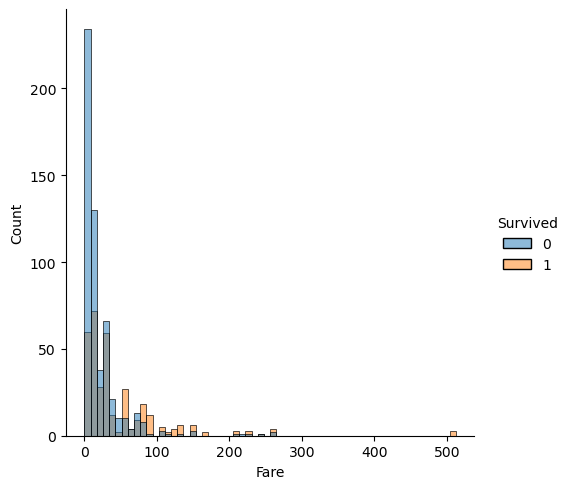

In [48]:
#tambien da curiosidad ver si hay gente que sobrevivio dependiendo de cuanto pago asi que hagamos una grafica
fig = plt.figure(figsize=(3,3))
sns.displot(df, x="Fare", hue="Survived",kind='hist')
plt.show()

Podemos ver que si hay una clara diferencia. Hagamos zoom para ver la primera parte de la grafica

<Figure size 300x300 with 0 Axes>

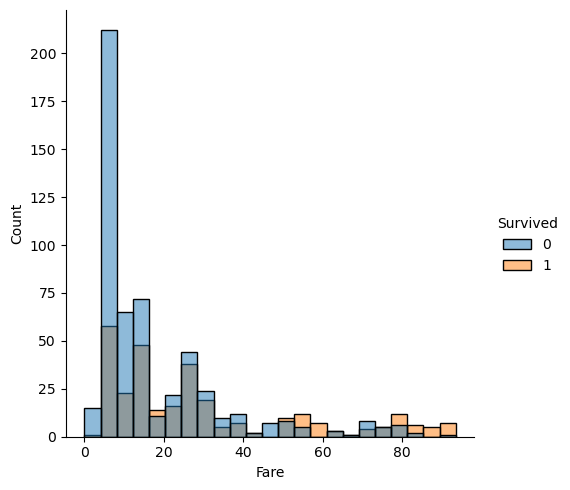

In [50]:
fig = plt.figure(figsize=(3,3))
idx = df[(df.Fare>100)].index
sns.displot(data=df.drop(idx), x="Fare", hue="Survived",kind='hist')
plt.show()

WOW. Muchisima gente que pago un precio muy barato no sobrevivio pero si vemos los que pagaron mas alto hay un cierto nivel de similaridad entre los que si sobrevivieron y los que no. Por último, chequemos la ausencia de datos que hay en la base de datos. Seguramente hay datos faltantes por la epoca en la que la tragedia sucedio.

In [51]:
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


hay una notable ausencia de datos en la variable de "cabin" y de "age". Esto refleja la importancia que se le daba a la informacion en aquella epoca, a diferencia de hoy, en el que si un avion se estrella sabriamos mucho mas de todos los involucrados